In [1]:
import pickle
import os 
from itertools import product

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

from pycgp import single_mutation, point_mutation, probabilistic_mutation
from pycgp.gems import MatchByActiveStrategy, MatchPMStrategy, MatchSMStrategy

from utils import load_data, aggregate_statistics, plot_fitnesses, plot_distributions

This notebook interpret the results of basic run of symbolic regression - 30 applications of gems until it expires, replacement of the worst gem in jewellery box, 5 individuals in population.

# Aggregate statistics

In [2]:
mutations = [
        (single_mutation, MatchSMStrategy),
        (point_mutation, MatchPMStrategy),
        (probabilistic_mutation, MatchSMStrategy),
        (single_mutation, MatchByActiveStrategy),
        (probabilistic_mutation, MatchByActiveStrategy)]

folder = 'scripts/symbolic_5_pop_remove_oldest/'
data = aggregate_statistics(folder, mutations)
data.head()

,mutation,strategy,gems,columns,best,mean,median,std,avg_gem_count,gem_better,gem_worse,bf,mf
0,single_mutation,MatchSMStrategy,0,10,0.371117,1.386836e+08,0.801694,2.276929e+08,0.00,0.00,0.00,"[0.6655842142902243, 0.6157043575851505, 0.605...","[323.88265631428965, 412.83171269105577, 17137..."
1,single_mutation,MatchSMStrategy,0,50,0.321617,2.475144e+03,0.728756,7.754262e+03,0.00,0.00,0.00,"[0.6661150728434293, 0.5967120898094961, 0.580...","[6753858798.008028, 1954.4367300161655, 47518...."
2,single_mutation,MatchSMStrategy,0,100,0.329917,1.015087e+06,0.730972,3.209972e+06,0.00,0.00,0.00,"[0.6513441733633879, 0.6199264292880702, 0.610...","[1157613422.8497028, 194.31829062210858, 10376..."
3,single_mutation,MatchSMStrategy,5,10,0.372610,4.456401e+03,0.629578,1.403750e+04,5.15,75.05,29.75,"[0.6493199464713586, 0.6278072482166289, 0.611...","[6442.746069026508, 8.102747004385481, 446.810..."
4,single_mutation,MatchSMStrategy,5,50,0.288238,6.022140e+04,0.762143,1.877834e+05,5.60,50.70,37.80,"[0.6350064385003932, 0.6033569613591168, 0.594...","[5058821.330104294, 1448028884.6745946, 28.554..."


In [3]:
data.groupby('gems').mean()

,best,mean,median,std,avg_gem_count,gem_better,gem_worse
gems,,,,,,,
0,0.277570,1.844349e+26,2.635466,5.832345e+26,0.000000,0.000000,0.000000
5,0.268931,3.266944e+06,2.099441,1.032571e+07,6.863333,58.950000,100.686667
10,0.268999,4.206202e+09,1.816965,1.330114e+10,9.893333,69.396667,116.676667


Overall, gems brough significant improvement in terms of best fitness achieved and mean of generation containing best fitness. Intersting observation is the slightly worse result in case of 10 gems.

Let's have a look at performance according to mutation and match strategy used.

In [4]:
data.groupby(['mutation', 'strategy']).mean()

best          mean  \
mutation               strategy                                        
point_mutation         MatchPMStrategy        0.292049  3.073916e+26   
probabilistic_mutation MatchByActiveStrategy  0.205478  6.928239e+09   
                       MatchSMStrategy        0.196971  3.033606e+06   
single_mutation        MatchByActiveStrategy  0.331753  1.009410e+08   
                       MatchSMStrategy        0.332916  1.572364e+07   

                                                median           std  \
mutation               strategy                                        
point_mutation         MatchPMStrategy        0.363060  9.720575e+26   
probabilistic_mutation MatchByActiveStrategy  2.907201  2.190900e+10   
                       MatchSMStrategy        5.663231  9.570126e+06   
single_mutation        MatchByActiveStrategy  1.186435  2.957248e+08   
                       MatchSMStrategy        0.799861  2.629234e+07   

                                              avg_gem_count  gem_better  \
mutation               strategy                                           
point_mutation         MatchPMStrategy             5.300000  103.638889   
probabilistic_mutation MatchByActiveStrategy       5.472222   22.916667   
                       MatchSMStrategy             4.405556    0.700000   
single_mutation        MatchByActiveStrategy       7.894444   48.077778   
                       MatchSMStrategy             4.855556   38.577778   

                                               gem_worse  
mutation               strategy                           
point_mutation         MatchPMStrategy         21.988889  
probabilistic_mutation MatchByActiveStrategy  123.300000  
                       MatchSMStrategy          1.550000  
single_mutation        MatchByActiveStrategy  191.005556  
                       MatchSMStrategy         24.427778

Best performance was achieved by probabilistic mutation, using match by all strategy. Let's have a look at its performance according to JBox size.

In [5]:
data[(data['mutation'] == 'probabilistic_mutation') & (data['strategy'] == 'MatchSMStrategy' )].iloc[:,:-2]

,mutation,strategy,gems,columns,best,mean,median,std,avg_gem_count,gem_better,gem_worse
18,probabilistic_mutation,MatchSMStrategy,0,10,0.194988,3.489868e+02,1.357749,1.068109e+03,0.00,0.00,0.00
19,probabilistic_mutation,MatchSMStrategy,0,50,0.192577,1.670770e+04,1.662653,4.597033e+04,0.00,0.00,0.00
20,probabilistic_mutation,MatchSMStrategy,0,100,0.204319,9.082877e+06,13.900254,2.866059e+07,0.00,0.00,0.00
21,probabilistic_mutation,MatchSMStrategy,5,10,0.191247,1.447121e+03,1.707718,4.453379e+03,4.95,3.35,7.25
22,probabilistic_mutation,MatchSMStrategy,5,50,0.192577,1.670770e+04,1.662653,4.597033e+04,5.00,0.00,0.00
23,probabilistic_mutation,MatchSMStrategy,5,100,0.204319,9.082877e+06,13.900254,2.866059e+07,5.00,0.00,0.00
24,probabilistic_mutation,MatchSMStrategy,10,10,0.195816,1.901783e+03,1.214891,5.926788e+03,7.55,2.95,6.70
25,probabilistic_mutation,MatchSMStrategy,10,50,0.192577,1.670770e+04,1.662653,4.597033e+04,8.60,0.00,0.00
26,probabilistic_mutation,MatchSMStrategy,10,100,0.204319,9.082877e+06,13.900254,2.866059e+07,8.55,0.00,0.00


An interesting observation here: on larger graphs, no gems were actually used. This could by due to very low probability of match by all strategy on larger graph. Only on small graphs (size 10) the gems were applied. Positive fact is, that even small number of gems applications on those small graphs leads to better results. 

What about peformance of gems with match by active strategy?

Will we observe similar behaviour on Match By All strategy with single mutation?

In [6]:
data[(data['mutation'] == 'probabilistic_mutation') & (data['strategy'] == 'MatchByActiveStrategy' )].iloc[:,:-2]

,mutation,strategy,gems,columns,best,mean,median,std,avg_gem_count,gem_better,gem_worse
36,probabilistic_mutation,MatchByActiveStrategy,0,10,0.194988,3.489868e+02,1.357749,1.068109e+03,0.00,0.00,0.00
37,probabilistic_mutation,MatchByActiveStrategy,0,50,0.192577,1.670770e+04,1.662653,4.597033e+04,0.00,0.00,0.00
38,probabilistic_mutation,MatchByActiveStrategy,0,100,0.204319,9.082877e+06,13.900254,2.866059e+07,0.00,0.00,0.00
39,probabilistic_mutation,MatchByActiveStrategy,5,10,0.215123,2.997692e+02,1.264991,9.299324e+02,8.00,38.60,188.45
40,probabilistic_mutation,MatchByActiveStrategy,5,50,0.180599,1.175480e+05,1.412718,3.716789e+05,8.25,34.35,185.10
41,probabilistic_mutation,MatchByActiveStrategy,5,100,0.204205,3.523171e+07,2.392873,1.114110e+08,6.85,24.40,157.65
42,probabilistic_mutation,MatchByActiveStrategy,10,10,0.242395,1.336132e+04,1.237899,4.221512e+04,7.90,37.30,179.25
43,probabilistic_mutation,MatchByActiveStrategy,10,50,0.218176,1.026820e+05,1.467978,2.923441e+05,8.15,35.15,179.05
44,probabilistic_mutation,MatchByActiveStrategy,10,100,0.196917,6.230959e+10,1.467696,1.970402e+11,10.10,36.45,220.20


In [7]:
data[(data['mutation'] == 'single_mutation') & (data['strategy'] == 'MatchSMStrategy' )].iloc[:,:-2]

,mutation,strategy,gems,columns,best,mean,median,std,avg_gem_count,gem_better,gem_worse
0,single_mutation,MatchSMStrategy,0,10,0.371117,1.386836e+08,0.801694,2.276929e+08,0.00,0.00,0.00
1,single_mutation,MatchSMStrategy,0,50,0.321617,2.475144e+03,0.728756,7.754262e+03,0.00,0.00,0.00
2,single_mutation,MatchSMStrategy,0,100,0.329917,1.015087e+06,0.730972,3.209972e+06,0.00,0.00,0.00
3,single_mutation,MatchSMStrategy,5,10,0.372610,4.456401e+03,0.629578,1.403750e+04,5.15,75.05,29.75
4,single_mutation,MatchSMStrategy,5,50,0.288238,6.022140e+04,0.762143,1.877834e+05,5.60,50.70,37.80
5,single_mutation,MatchSMStrategy,5,100,0.307444,8.786491e+05,0.777111,2.773130e+06,5.30,38.15,33.25
6,single_mutation,MatchSMStrategy,10,10,0.322436,3.254531e+01,0.664839,9.501826e+01,7.80,84.50,37.60
7,single_mutation,MatchSMStrategy,10,50,0.354232,1.526105e+02,1.349331,4.692860e+02,10.05,49.40,42.40
8,single_mutation,MatchSMStrategy,10,100,0.328632,8.680253e+05,0.754321,2.744927e+06,9.80,49.40,39.05


Here, when it comes to 5 gems,the results are slightly better, in 10 gems case, the results are however slightly worse.

So we see, that best performance can be achieved by probabilistic mutation and match by all strategy and gems can further improve this performance, albeit slightly. Let's see which mutation performed worst and see effect of gems on this settings.

In [8]:
data[data.gems == 0].groupby('mutation').mean()

,best,mean,median,std,avg_gem_count,gem_better,gem_worse
mutation,,,,,,,
point_mutation,0.311493,9.221747e+26,0.389277,2.916172e+27,0.0,0.0,0.0
probabilistic_mutation,0.197295,3.033311e+06,5.640219,9.569210e+06,0.0,0.0,0.0
single_mutation,0.340884,4.656706e+07,0.753807,7.697022e+07,0.0,0.0,0.0


As with *remove oldest* gem removal, worse performance was provided by single mutation. Let's have a closer look at that.

In [9]:
data[(data['mutation'] == 'single_mutation')].groupby(['strategy', 'gems']).mean()

best          mean    median           std  \
strategy              gems                                                   
MatchByActiveStrategy 0     0.340884  4.656706e+07  0.753807  7.697022e+07   
                      5     0.329379  1.203401e+06  1.974860  3.805317e+06   
                      10    0.324997  2.550524e+08  0.830638  8.063988e+08   
MatchSMStrategy       0     0.340884  4.656706e+07  0.753807  7.697022e+07   
                      5     0.322764  3.144423e+05  0.722944  9.916502e+05   
                      10    0.335100  2.894035e+05  0.922830  9.151638e+05   

                            avg_gem_count  gem_better   gem_worse  
strategy              gems                                         
MatchByActiveStrategy 0          0.000000    0.000000    0.000000  
                      5         10.383333   68.316667  265.033333  
                      10        13.300000   75.916667  307.983333  
MatchSMStrategy       0          0.000000    0.000000    0.000000  
                      5          5.350000   54.633333   33.600000  
                      10         9.216667   61.100000   39.683333

In [10]:
data.groupby(['mutation', 'strategy', 'gems']).mean()

best          mean  \
mutation               strategy              gems                           
point_mutation         MatchPMStrategy       0     0.311493  9.221747e+26   
                                             5     0.296487  1.634942e+01   
                                             10    0.268167  2.731678e+06   
probabilistic_mutation MatchByActiveStrategy 0     0.197295  3.033311e+06   
                                             5     0.199976  1.178319e+07   
                                             10    0.219163  2.076990e+10   
                       MatchSMStrategy       0     0.197295  3.033311e+06   
                                             5     0.196048  3.033677e+06   
                                             10    0.197571  3.033829e+06   
single_mutation        MatchByActiveStrategy 0     0.340884  4.656706e+07   
                                             5     0.329379  1.203401e+06   
                                             10    0.324997  2.550524e+08   
                       MatchSMStrategy       0     0.340884  4.656706e+07   
                                             5     0.322764  3.144423e+05   
                                             10    0.335100  2.894035e+05   

                                                     median           std  \
mutation               strategy              gems                           
point_mutation         MatchPMStrategy       0     0.389277  2.916172e+27   
                                             5     0.352332  3.728787e+01   
                                             10    0.347569  8.638323e+06   
probabilistic_mutation MatchByActiveStrategy 0     5.640219  9.569210e+06   
                                             5     1.690194  3.726119e+07   
                                             10    1.391191  6.568018e+10   
                       MatchSMStrategy       0     5.640219  9.569210e+06   
                                             5     5.756875  9.570338e+06   
                                             10    5.592599  9.570830e+06   
single_mutation        MatchByActiveStrategy 0     0.753807  7.697022e+07   
                                             5     1.974860  3.805317e+06   
                                             10    0.830638  8.063988e+08   
                       MatchSMStrategy       0     0.753807  7.697022e+07   
                                             5     0.722944  9.916502e+05   
                                             10    0.922830  9.151638e+05   

                                                   avg_gem_count  gem_better  \
mutation               strategy              gems                              
point_mutation         MatchPMStrategy       0          0.000000    0.000000   
                                             5          5.900000  138.233333   
                                             10        10.000000  172.683333   
probabilistic_mutation MatchByActiveStrategy 0          0.000000    0.000000   
                                             5          7.700000   32.450000   
                                             10         8.716667   36.300000   
                       MatchSMStrategy       0          0.000000    0.000000   
                                             5          4.983333    1.116667   
                                             10         8.233333    0.983333   
single_mutation        MatchByActiveStrategy 0          0.000000    0.000000   
                                             5         10.383333   68.316667   
                                             10        13.300000   75.916667   
                       MatchSMStrategy       0          0.000000    0.000000   
                                             5          5.350000   54.633333   
                                             10         9.216667   61.100000   

                                                    gem_worse  
mutation  

Interesting property is the worse performance of match by all strategy, when using 10 JBox size. We do not see this in case of *oldest removal*. Other than that, runs with gems yielded better results on average.

Let's plot the average best fitness of probabilistic and single mutations.

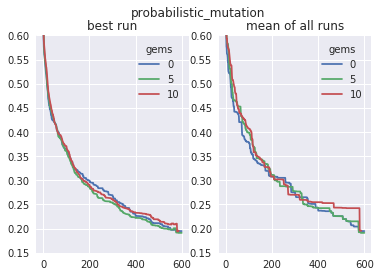

In [11]:
plot_fitnesses(data, 'probabilistic_mutation', (0.15, 0.6))

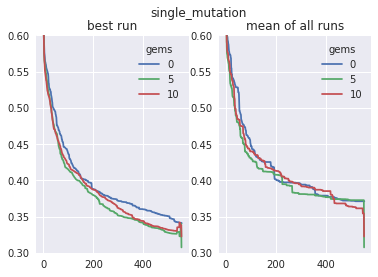

In [12]:
plot_fitnesses(data, 'single_mutation', (0.3, 0.6))

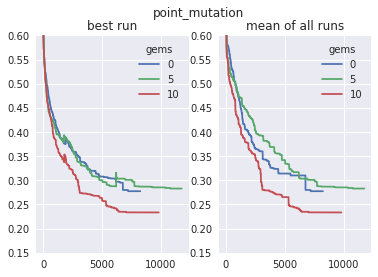

In [13]:
plot_fitnesses(data, 'point_mutation', (0.15, 0.6))

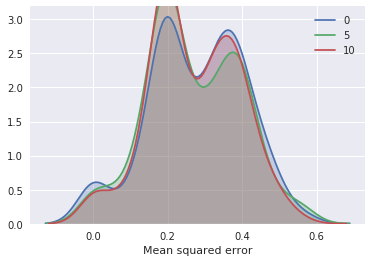

In [14]:
ax = plot_distributions(folder, mutations)
ax.set_xlabel('Mean squared error')
plt.savefig('test.pdf', format='pdf', dpi=1000)

# Conclusion

Gems were able to improve performance in almost all instances of experiment. Best performance overall was achieved by 